# Packages and Libraries

In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
!pip install keras tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install opencv-python
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg

#MUSIC PROCESS
!pip install pydub
import pydub
from scipy.io.wavfile import read, write
!pip install librosa
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
import pickle

#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

#MODEL LAYERS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras

#SKLEARN CLASSIFIER
!pip install xgboost
from xgboost import XGBClassifier, XGBRegressor
!pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
!pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\esther\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Path, Label, Tranformation

### Main

In [5]:
Main_WAV_Path = Path("C:/Users/esther/Downloads/Emotion Detection Text Sentiment Analysis/TESS Toronto emotional speech set data")

### Wav Path

In [7]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

In [8]:
def extract_emotion(path_string):
    if not isinstance(path_string, str):
        path_string = str(path_string)

    parts = path_string.split(os.sep)

    if len(parts) >= 2:
        potential_emotion_dir = parts[-2] 
    
        if '_' in potential_emotion_dir:
            emotion = potential_emotion_dir.split('_')[1]
            return emotion
        else:
            potential_emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
            if potential_emotion_dir.lower() in potential_emotions:
                emotion = potential_emotion_dir
            else:
                emotion = "unknown"
    else:
        emotion = "unknown"
    return emotion.lower()

### Wav Labels

In [10]:
Wav_Labels = [extract_emotion(path) for path in Wav_Path]

### To Series

In [12]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

### To Dataframe

In [14]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [15]:
print("\nDataFrame head:")
print(Main_Wav_Data.head())


DataFrame head:
                                                 WAV EMOTION
0  C:\Users\esther\Downloads\Emotion Detection Te...   angry
1  C:\Users\esther\Downloads\Emotion Detection Te...   angry
2  C:\Users\esther\Downloads\Emotion Detection Te...   angry
3  C:\Users\esther\Downloads\Emotion Detection Te...   angry
4  C:\Users\esther\Downloads\Emotion Detection Te...   angry


In [16]:
print("\nEmotion counts:")
print(Main_Wav_Data["EMOTION"].value_counts())


Emotion counts:
EMOTION
angry       400
disgust     400
happy       400
neutral     400
Fear        200
Pleasant    200
Sad         200
fear        200
pleasant    200
sad         200
Name: count, dtype: int64


In [17]:
def standardize_existing_dataframe(df, column_name="EMOTION"):
    # Convert all values in the specified column to lowercase
    df[column_name] = df[column_name].str.lower()
    return df

In [18]:
Main_Wav_Data = standardize_existing_dataframe(Main_Wav_Data)

In [19]:
print("\nEmotion counts after standardization:")
print(Main_Wav_Data["EMOTION"].value_counts())


Emotion counts after standardization:
EMOTION
angry       400
disgust     400
fear        400
happy       400
neutral     400
pleasant    400
sad         400
Name: count, dtype: int64


### To Shuffle

In [21]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [22]:
print("\nShuffled DataFrame head:")
print(Main_Wav_Data.head())


Shuffled DataFrame head:
                                                 WAV   EMOTION
0  C:\Users\esther\Downloads\Emotion Detection Te...      fear
1  C:\Users\esther\Downloads\Emotion Detection Te...  pleasant
2  C:\Users\esther\Downloads\Emotion Detection Te...     angry
3  C:\Users\esther\Downloads\Emotion Detection Te...     happy
4  C:\Users\esther\Downloads\Emotion Detection Te...       sad


# Data Processing Functions

### Noise

In [25]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

### Stretch

In [27]:
def stretch_process(data,rate=0.8):
    
    return librosa.effects.time_stretch(y=data,rate=rate)

### Shift

In [29]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)
    
    return np.roll(data,shift_range)

### Pitch

In [31]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

### Extract Features

In [33]:
def extract_process(data,sample_rate):
    output_result = np.array([])
    
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))
    
    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))
    
    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))
    
    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack([output_result, mel_spectogram])

    # if len(output_result) > 704:
        #output_result = output_result[:704]  # Trim excess features
    #elif len(output_result) < 704:
       # output_result = np.pad(output_result, (0, 704 - len(output_result)), mode='constant')
    
    return output_result

### Export Features

In [35]:
def export_process(path):
    
    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)
    
    output_1 = extract_process(data,sample_rate)
    result = np.array(output_1)
    
    noise_out = add_noise(data)
    output_2 = extract_process(noise_out,sample_rate)
    result = np.vstack((result,output_2))
    
    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch,sample_rate)
    result = np.vstack((result,output_3))
    
    return result

# Analysis

### Hearing

In [38]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

sad


In [39]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

happy


In [40]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

sad


### Shape - Type

In [42]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

sad
(54005,)
int16
24414


In [43]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

disgust
(62651,)
int16
24414


In [44]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

angry
(50067,)
int16
24414


### Waveplot

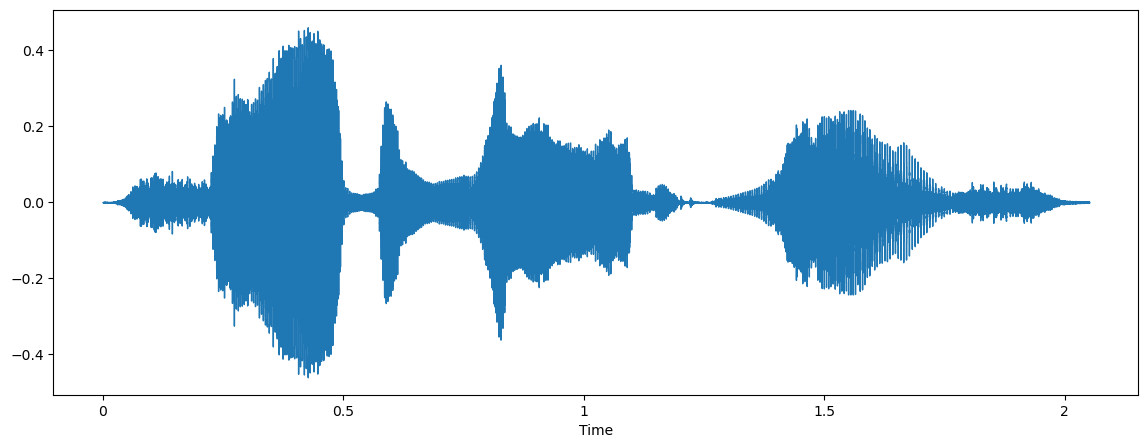

In [46]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

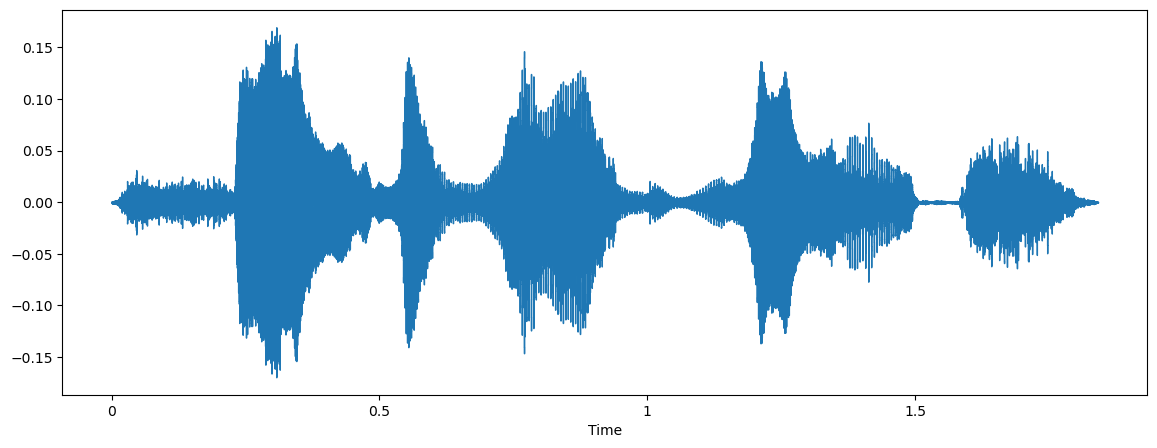

In [47]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

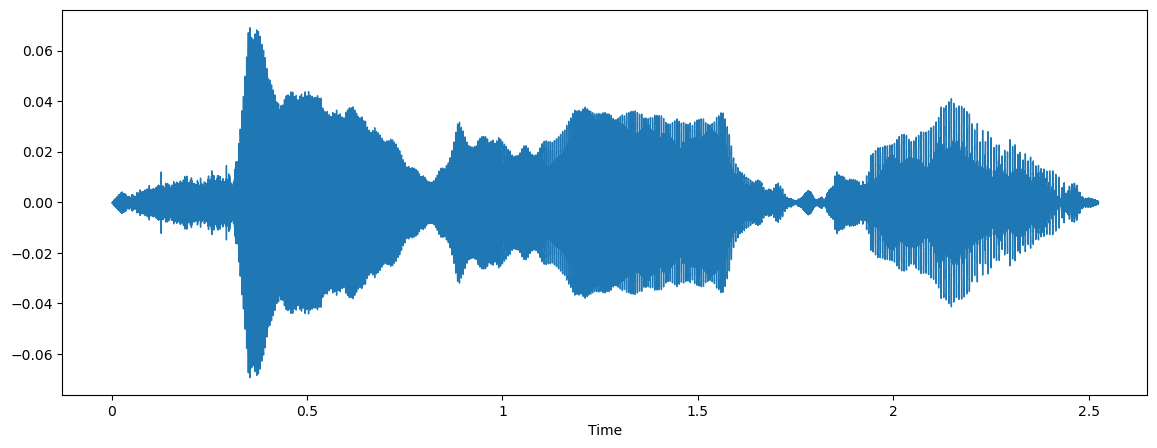

In [48]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

### Specshow

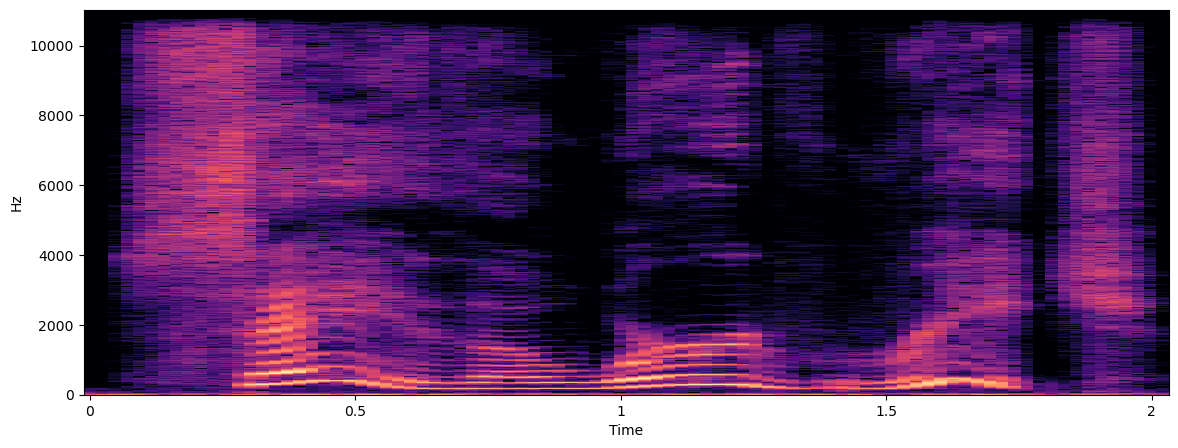

In [50]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

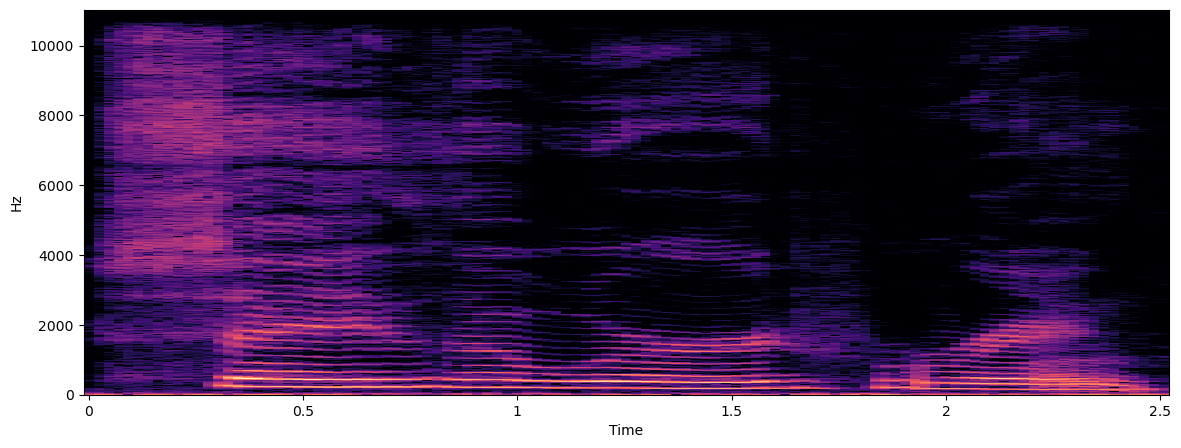

In [51]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

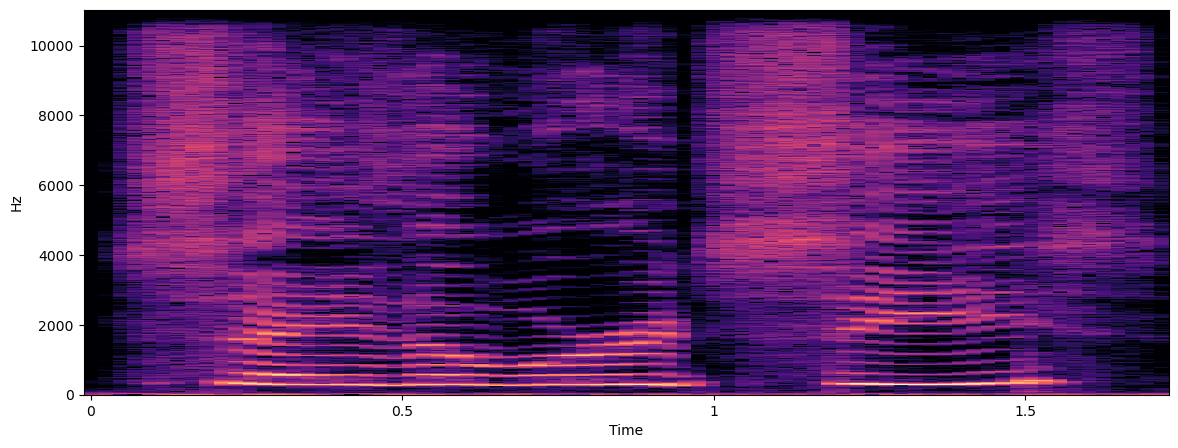

In [52]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

### Noise

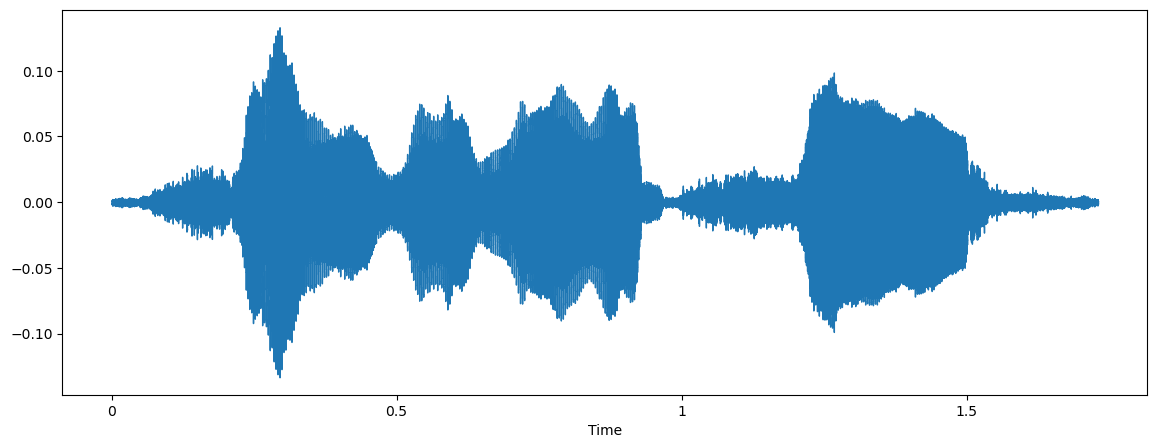

In [54]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)


### Streching

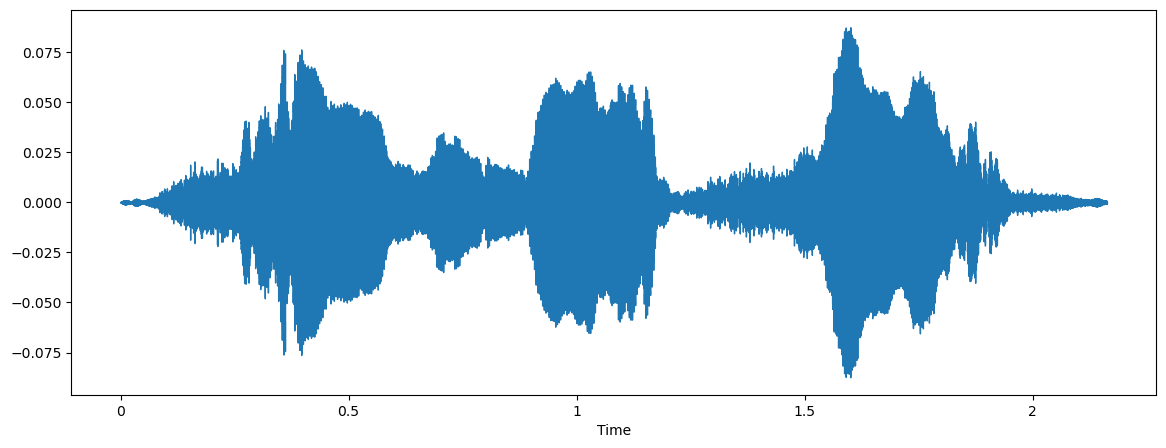

In [56]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

### Shifting

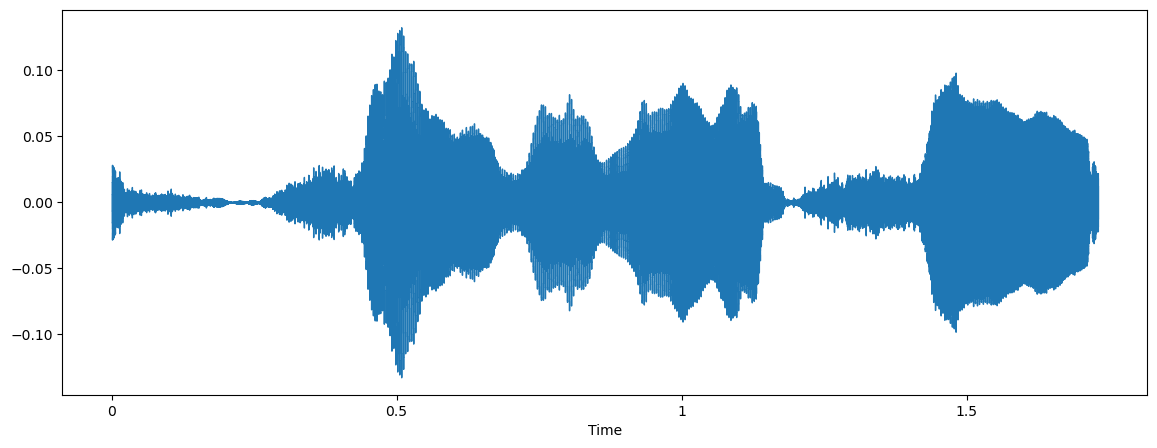

In [58]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

### Pitch

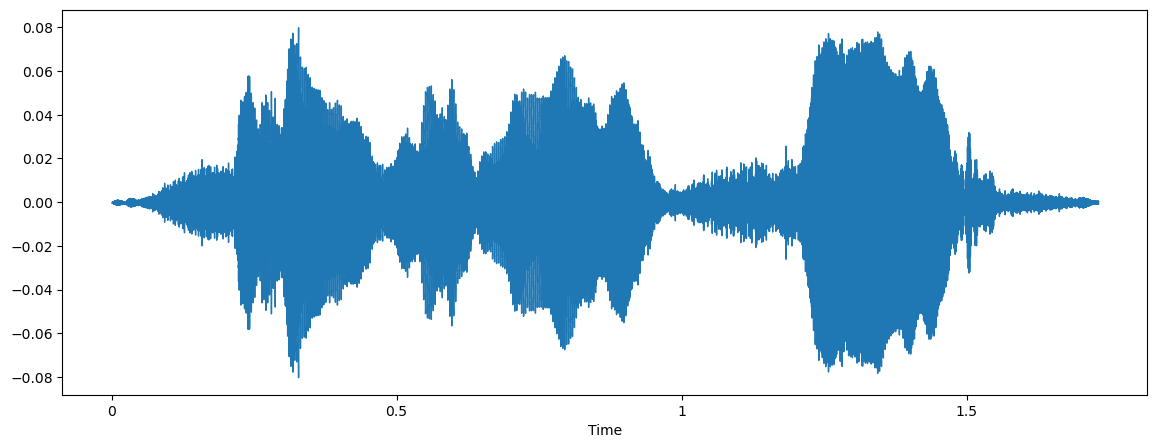

In [60]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

### Same Timeframe Period

(29337,)


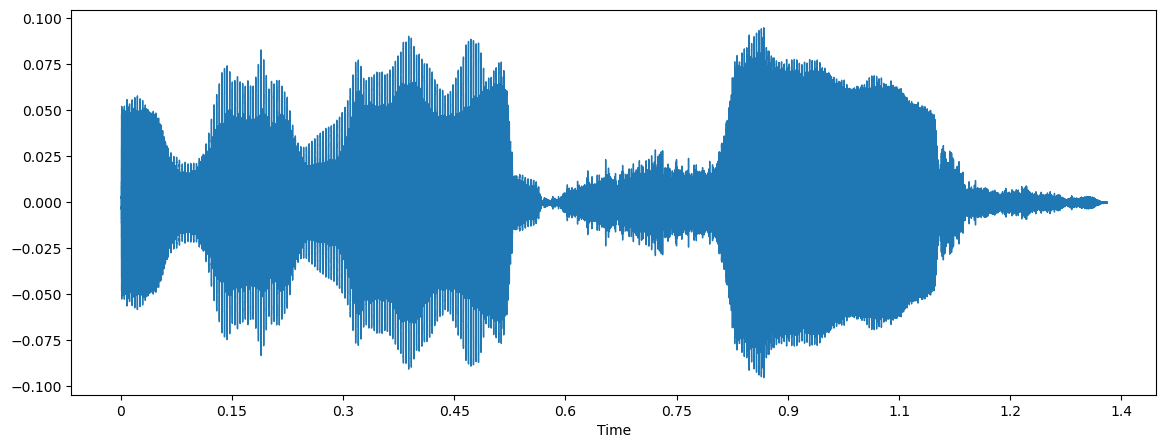

In [62]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(27917,)


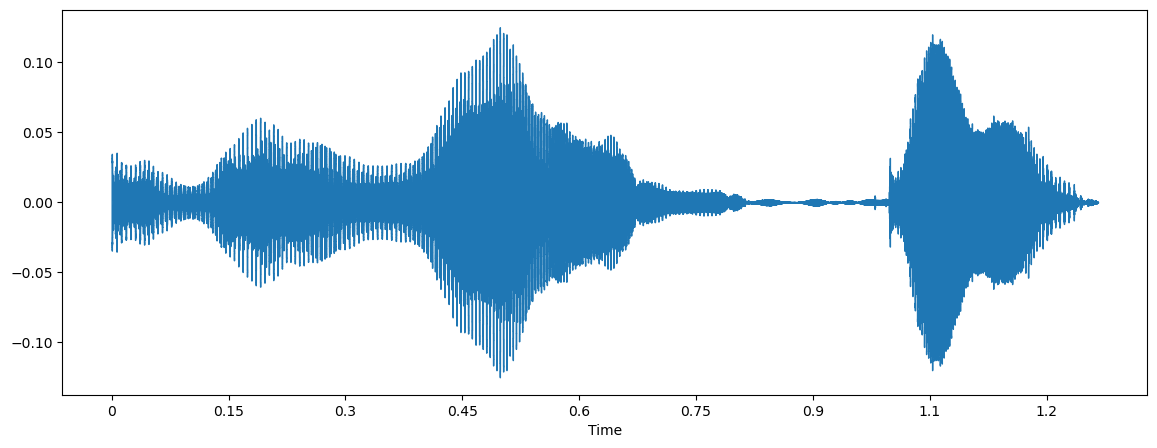

In [63]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(36946,)


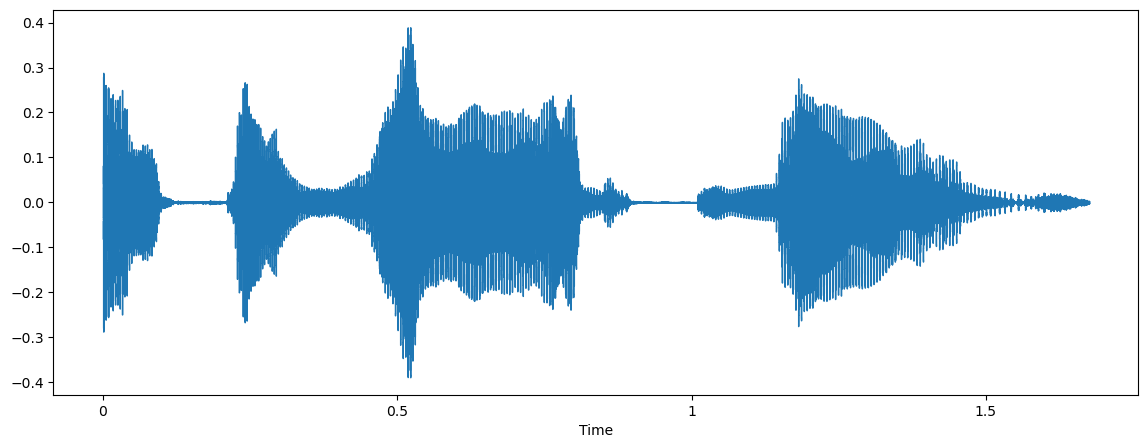

In [64]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

# Data Processing and Engineering

### Transformation and Exportation

In [67]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    
    features = export_process(path)
    
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [68]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

8400
8400
2800


In [69]:
print(x_Train[0].shape)

(162,)


In [70]:
print(y_Train[0:5])

['fear', 'fear', 'fear', 'pleasant', 'pleasant']


In [71]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [72]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.080467,0.442392,0.312265,0.256726,0.313028,0.438007,0.590693,0.438238,0.349682,0.336077,...,0.000468,0.000561,0.000729,0.000549,0.000485,0.000239,0.000101,0.000039,0.000003,fear
1,0.095873,0.458908,0.336019,0.288480,0.360253,0.489208,0.626041,0.455749,0.362245,0.349826,...,0.000895,0.000991,0.001222,0.001022,0.000987,0.000689,0.000558,0.000512,0.000480,fear
2,0.082760,0.455519,0.390723,0.252210,0.244872,0.361603,0.546801,0.594469,0.337327,0.312743,...,0.000256,0.000176,0.000121,0.000156,0.000171,0.000174,0.000144,0.000036,0.000002,fear
3,0.054288,0.329239,0.306955,0.363549,0.362722,0.412589,0.530395,0.708045,0.724907,0.576780,...,0.000165,0.000113,0.000151,0.000106,0.000074,0.000054,0.000040,0.000017,0.000001,pleasant
4,0.096973,0.375360,0.413327,0.443905,0.454478,0.523200,0.635076,0.747967,0.690683,0.534378,...,0.000299,0.000246,0.000306,0.000249,0.000224,0.000196,0.000167,0.000172,0.000132,pleasant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.151391,0.552357,0.572028,0.466427,0.488730,0.584053,0.471949,0.421917,0.428863,0.465848,...,0.007456,0.005875,0.003785,0.001972,0.001585,0.001042,0.000828,0.000631,0.000047,angry
8395,0.249299,0.604549,0.667328,0.587803,0.615241,0.723497,0.575365,0.507492,0.527706,0.564678,...,0.008967,0.007818,0.005714,0.003778,0.003450,0.003102,0.002696,0.002458,0.001976,angry
8396,0.196978,0.659506,0.556982,0.600336,0.466553,0.485700,0.594688,0.481158,0.425006,0.441298,...,0.001473,0.002233,0.001303,0.001078,0.000482,0.000343,0.000256,0.000116,0.000008,angry
8397,0.089551,0.395953,0.408449,0.523501,0.328204,0.246603,0.270467,0.301945,0.294418,0.443683,...,0.001815,0.001608,0.000790,0.000702,0.000917,0.000412,0.000215,0.000187,0.000039,happy


In [73]:
print(New_Features_Wav["EMOTIONS"].value_counts())

EMOTIONS
fear        1200
pleasant    1200
angry       1200
happy       1200
sad         1200
neutral     1200
disgust     1200
Name: count, dtype: int64


### Splitting

In [75]:
#encoder_label = OneHotEncoder()
#encoder_label.fit(emotion_labels)

In [76]:
scaler_data = StandardScaler()

In [77]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [78]:
print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [79]:
if Y.ndim > 1:
    Y = np.argmax(Y,axis = 1)

encoder_label = LabelEncoder()
Y = encoder_label.fit_transform(Y)

print("Number of unique emotions:", len(np.unique(encoder_label.classes_)))
print("Unique emotion classes:", encoder_label.classes_)

Number of unique emotions: 7
Unique emotion classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'pleasant' 'sad']


In [80]:
with open("encoder_label.pkl", "wb") as f:
    pickle.dump(encoder_label,f)

print("LabelEncoder saved as encoder_label.pkl")

LabelEncoder saved as encoder_label.pkl


In [81]:
with open("encoder_label.pkl", "rb") as f:
    loaded_encoder = pickle.load(f)

print("Loaded object type:", type(loaded_encoder))
if hasattr(loaded_encoder, "classes_"):
    print("This is a valid LabelEncoder. Classes:", loaded_encoder.classes_)
else:
    print("Error: encoder_label.pkl is NOT a LabelEncoder!")

Loaded object type: <class 'sklearn.preprocessing._label.LabelEncoder'>
This is a valid LabelEncoder. Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'pleasant' 'sad']


In [82]:
print(Y.shape)

(8400,)


In [83]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [84]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(7560, 162)
(7560,)
(840, 162)
(840,)


In [85]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

with open("scaler_data.pkl", "wb") as f:
    pickle.dump(scaler_data,f)
print("Scaler saved as scaler_data.pkl")

Scaler saved as scaler_data.pkl


In [86]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162)
(840, 162)


In [87]:
# Print detailed shape information
print("Original xTrain shape:", X.shape)
print("xTrain size before reshaping:", xTrain.size)
print("xTrain number of samples:", xTrain.shape[0])
print("xTrain number of features:", xTrain.shape[1] if len(xTrain.shape) > 1 else "N/A")

# Calculate expected reshape size
expected_reshape_size = xTrain.shape[0] * 704 * 1
print("Expected reshape size:", expected_reshape_size)

# If the sizes don't match, we'll need to investigate why
# Option 1: Trim or pad the data
def reshape_to_fixed_size(data, target_features=704):
    if data.shape[1] > target_features:
        # Trim excess features
        return data[:, :target_features]
    elif data.shape[1] < target_features:
        # Pad with zeros
        pad_width = ((0, 0), (0, target_features - data.shape[1]))
        return np.pad(data, pad_width, mode='constant')
    return data

# Preprocess xTrain and xTest
xTrain = reshape_to_fixed_size(xTrain)
xTest = reshape_to_fixed_size(xTest)


xTrain = xTrain.reshape(xTrain.shape[0], 704, 1)
xTest = xTest.reshape(xTest.shape[0], 704, 1)
print("Reshaped xTrain shape:", xTrain.shape)
print("Reshaped xTest shape:", xTest.shape)

yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)
print("Final yTrain shape:", yTrain.shape)
print("Final yTest shape:", yTest.shape)

Original xTrain shape: (8400, 162)
xTrain size before reshaping: 1224720
xTrain number of samples: 7560
xTrain number of features: 162
Expected reshape size: 5322240
Reshaped xTrain shape: (7560, 704, 1)
Reshaped xTest shape: (840, 704, 1)
Final yTrain shape: (7560, 7)
Final yTest shape: (840, 7)


In [88]:
print(xTrain.shape)
print(xTest.shape)

(7560, 704, 1)
(840, 704, 1)


# Model Structure

In [90]:
num_emotion_classes = len(np.unique(encoder_label.classes_))

Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(704, 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=num_emotion_classes, activation='softmax'))

In [91]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [92]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 704, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 352, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 352, 256)            │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 176, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 176, 128)            │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 88, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 88, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 88, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 44, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2816)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          90,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624,839 (2.38 MB)

 Trainable params: 624,839 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [94]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=10, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 52s 379ms/step - accuracy: 0.2606 - loss: 1.7681 - val_accuracy: 0.6595 - val_loss: 1.0782
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 50s 420ms/step - accuracy: 0.6491 - loss: 0.9668 - val_accuracy: 0.8643 - val_loss: 0.4189
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 48s 406ms/step - accuracy: 0.7654 - loss: 0.6234 - val_accuracy: 0.8893 - val_loss: 0.3407
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 49s 408ms/step - accuracy: 0.7990 - loss: 0.4977 - val_accuracy: 0.9417 - val_loss: 0.2248
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 49s 410ms/step - accuracy: 0.8553 - loss: 0.3901 - val_accuracy: 0.9500 - val_loss: 0.1967
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 49s 413ms/step - accuracy: 0.8685 - loss: 0.3769 - val_accuracy: 0.9500 - val_loss: 0.1647
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 50s 423ms/step - accuracy: 0.9070 - loss: 0.2608 - val_accuracy: 0.9655 - val_loss: 0.1062
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 50s 417ms/step - accuracy: 0.9264 - loss: 0

In [95]:
Model.save("audio_sentiment_model.keras")

<Axes: >

<Figure size 1000x1000 with 0 Axes>

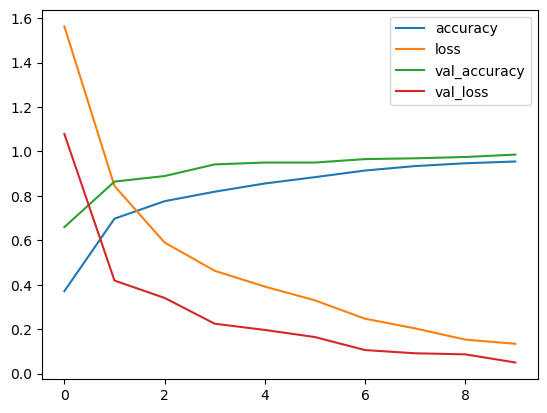

In [96]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


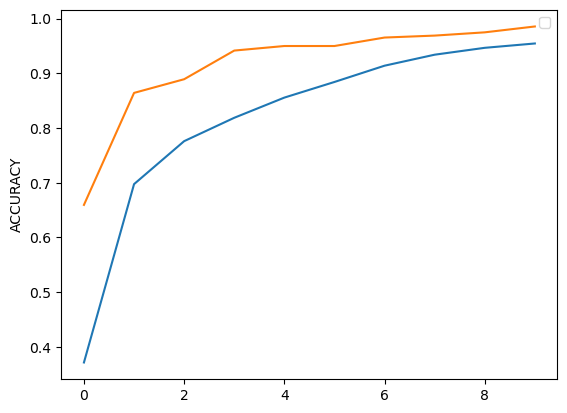

In [97]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


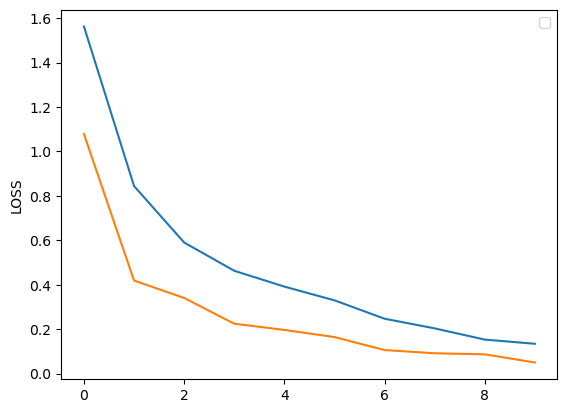

In [98]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()


### Prediction

In [100]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9916 - loss: 0.0366
LOSS:  0.0503
ACCURACY:  0.9857


In [101]:
prediction_test = Model.predict(xTest)
#y_prediction = encoder_label.inverse_transform(prediction_test)

#yTest = encoder_label.inverse_transform(yTest)

y_prediction_indices = np.argmax(prediction_test, axis=1)
#y_prediction = encoder_label.inverse_transform(y_prediction_indices)

yTest_indices = np.argmax(yTest, axis=1)
y_prediction = encoder_label.inverse_transform(y_prediction_indices)
yTest_labels = encoder_label.inverse_transform(yTest_indices)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


In [102]:
#print(prediction_test[0:10])

In [103]:
#print(y_prediction[0:10])

In [104]:
#print(yTest[0:10])

In [105]:
conf_matrix = confusion_matrix(yTest_labels, y_prediction)

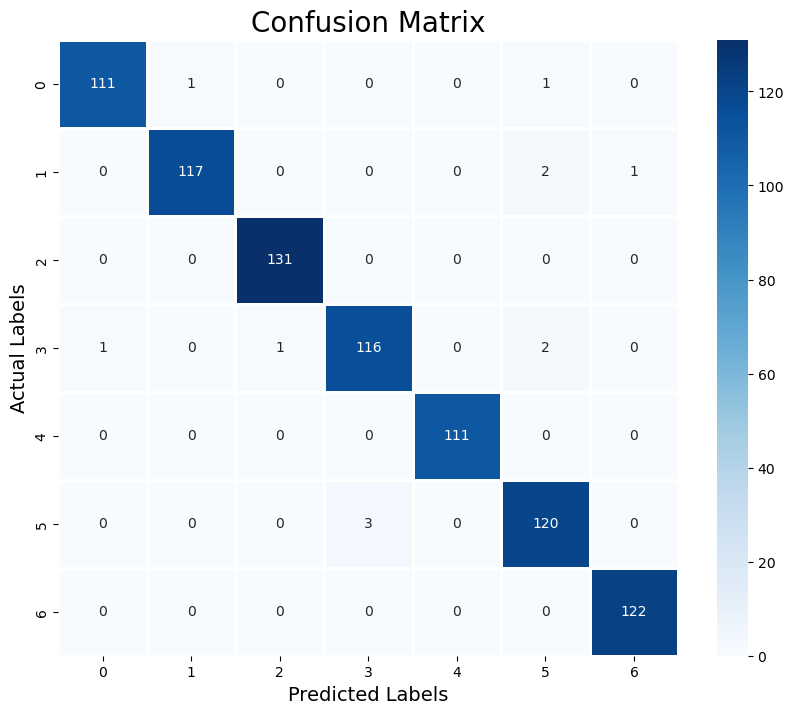

In [106]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [107]:
print(classification_report(yTest_labels, y_prediction))

              precision    recall  f1-score   support

       angry       0.99      0.98      0.99       113
     disgust       0.99      0.97      0.98       120
        fear       0.99      1.00      1.00       131
       happy       0.97      0.97      0.97       120
     neutral       1.00      1.00      1.00       111
    pleasant       0.96      0.98      0.97       123
         sad       0.99      1.00      1.00       122

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



In [108]:
print("Accuracy Score: ",accuracy_score(yTest_labels, y_prediction))

Accuracy Score:  0.9857142857142858
